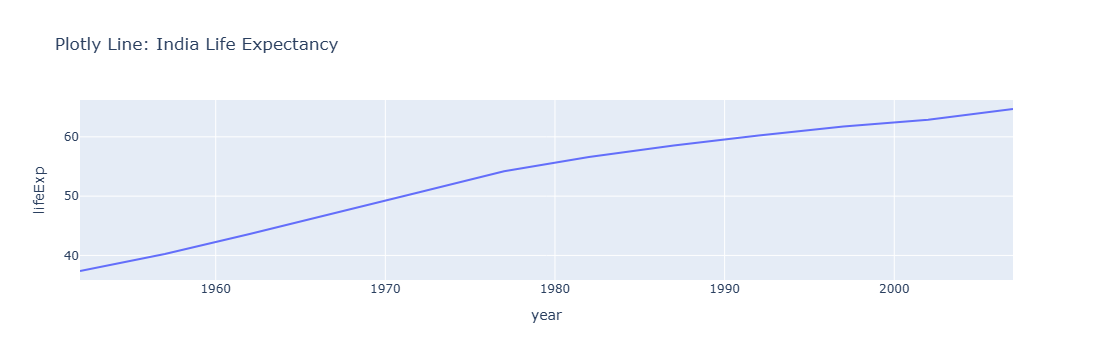

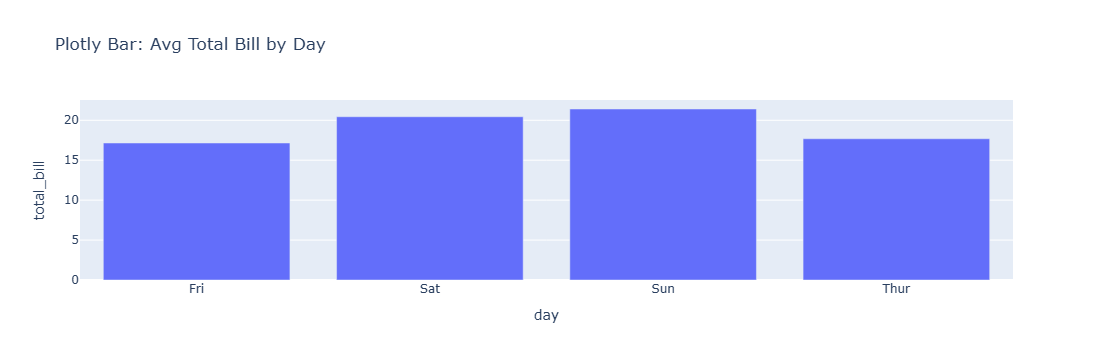

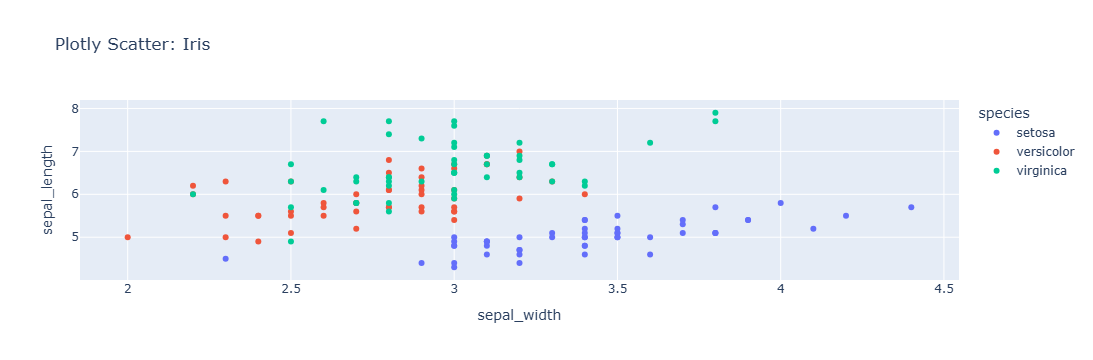

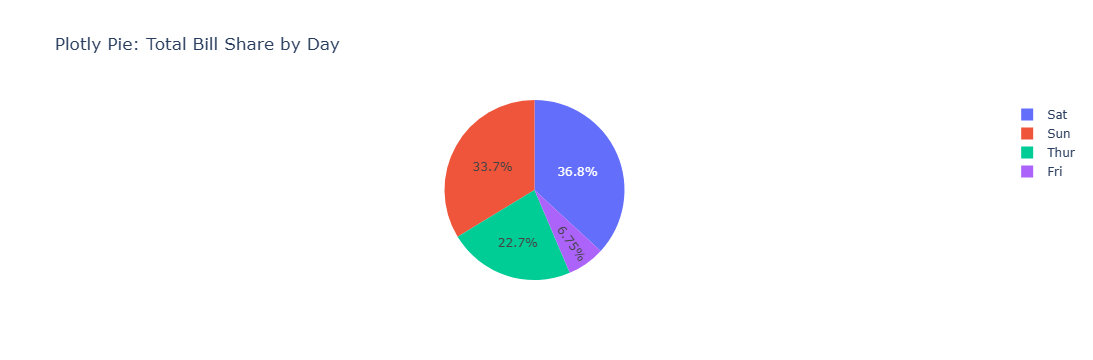

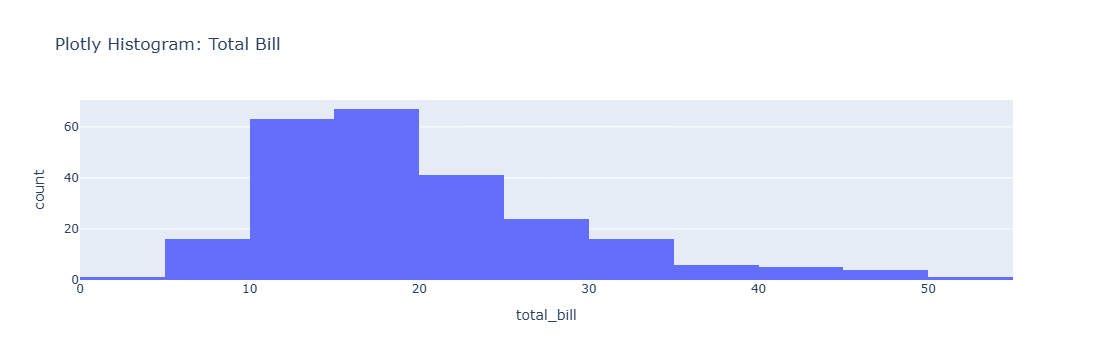

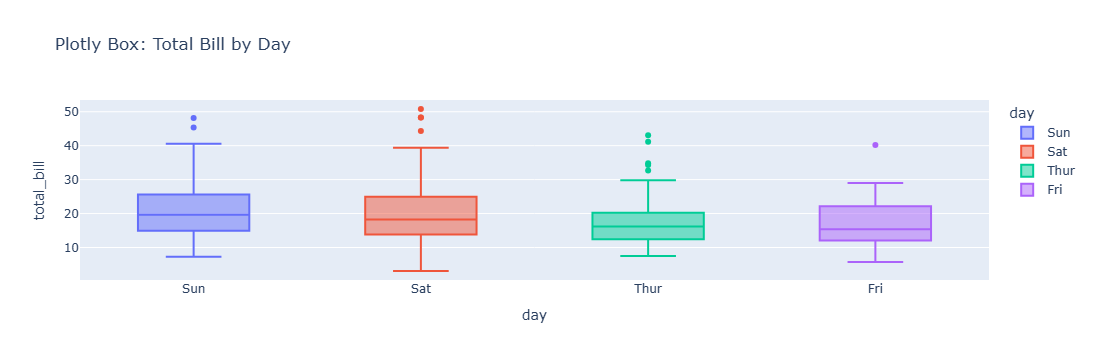

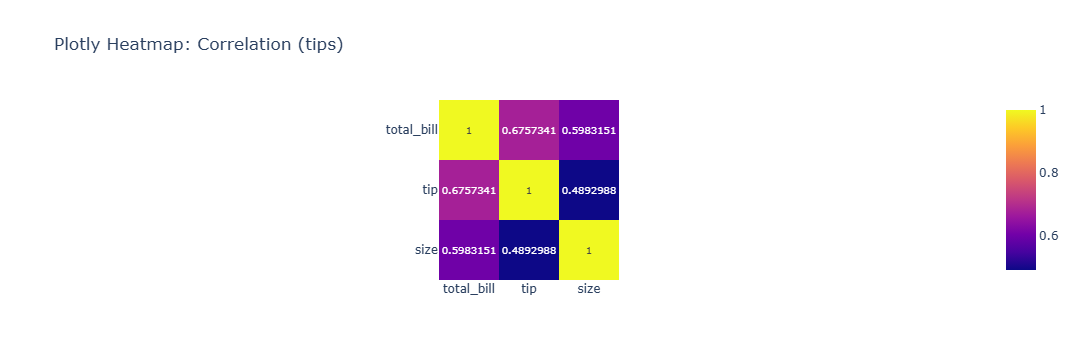

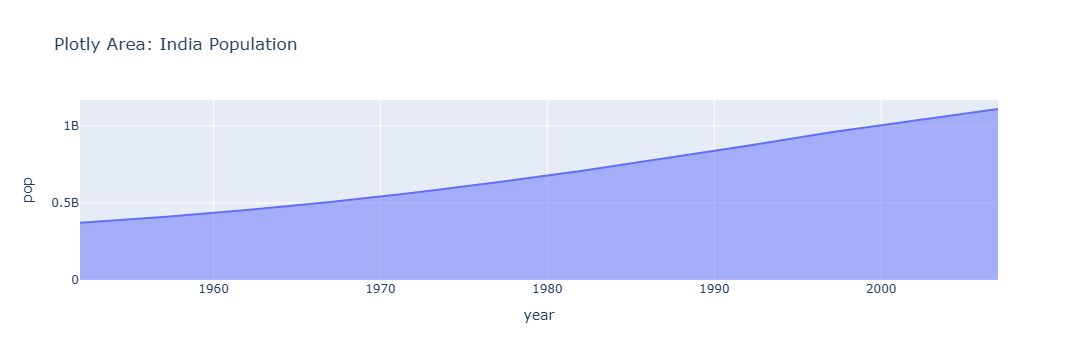

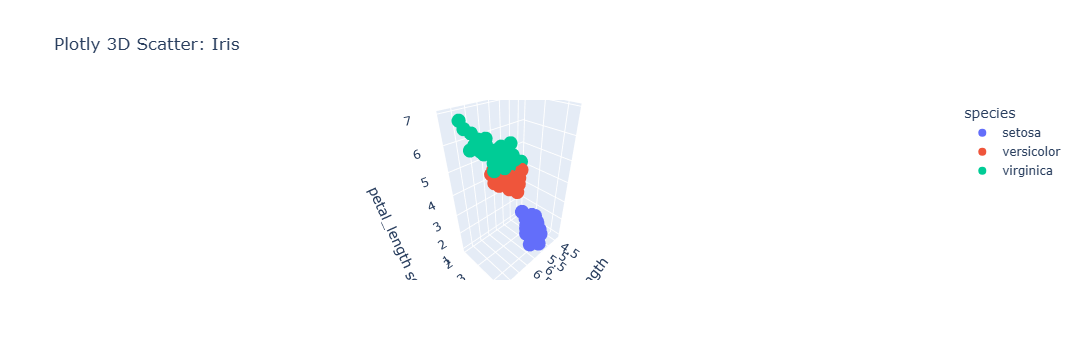

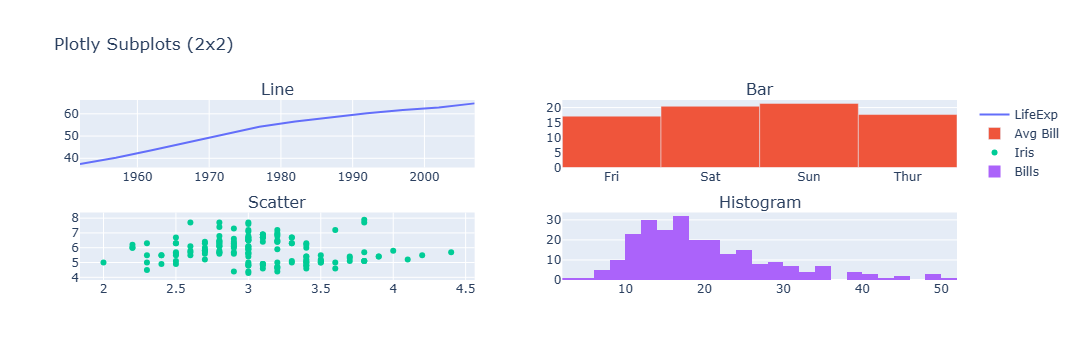

In [1]:
# Day 14 — Plotly (10 Examples)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Sample datasets
iris = px.data.iris()
tips = px.data.tips()
gap = px.data.gapminder()

# 1) LINE
fig = px.line(gap.query("country=='India'"), x="year", y="lifeExp", title="Plotly Line: India Life Expectancy")
fig.show()

# 2) BAR
bar_df = tips.groupby("day", as_index=False)["total_bill"].mean()
fig = px.bar(bar_df, x="day", y="total_bill", title="Plotly Bar: Avg Total Bill by Day")
fig.show()

# 3) SCATTER
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species", title="Plotly Scatter: Iris")
fig.show()

# 4) PIE
pie_df = tips.groupby("day", as_index=False)["total_bill"].sum()
fig = px.pie(pie_df, names="day", values="total_bill", title="Plotly Pie: Total Bill Share by Day")
fig.show()

# 5) HISTOGRAM
fig = px.histogram(tips, x="total_bill", nbins=20, title="Plotly Histogram: Total Bill")
fig.show()

# 6) BOX
fig = px.box(tips, x="day", y="total_bill", color="day", title="Plotly Box: Total Bill by Day")
fig.show()

# 7) HEATMAP (Correlation)
num_cols = tips.select_dtypes(include="number")
corr = num_cols.corr()
fig = px.imshow(corr, text_auto=True, title="Plotly Heatmap: Correlation (tips)")
fig.show()

# 8) AREA
india = gap.query("country=='India'").sort_values("year")
fig = px.area(india, x="year", y="pop", title="Plotly Area: India Population")
fig.show()

# 9) 3D SCATTER
fig = px.scatter_3d(iris, x="sepal_length", y="sepal_width", z="petal_length",
                    color="species", title="Plotly 3D Scatter: Iris")
fig.show()

# 10) SUBPLOTS (2x2)
fig = make_subplots(rows=2, cols=2, subplot_titles=("Line", "Bar", "Scatter", "Histogram"))
# line
india_le = india[["year","lifeExp"]]
fig.add_trace(go.Scatter(x=india_le["year"], y=india_le["lifeExp"], mode="lines", name="LifeExp"),
              row=1, col=1)
# bar
fig.add_trace(go.Bar(x=bar_df["day"], y=bar_df["total_bill"], name="Avg Bill"), row=1, col=2)
# scatter
fig.add_trace(go.Scatter(x=iris["sepal_width"], y=iris["sepal_length"], mode="markers", name="Iris"),
              row=2, col=1)
# histogram
fig.add_trace(go.Histogram(x=tips["total_bill"], name="Bills"), row=2, col=2)
fig.update_layout(title_text="Plotly Subplots (2x2)")
fig.show()


In [3]:
# Day 14 — Bokeh (10 Examples)


from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
from bokeh.transform import cumsum, linear_cmap, jitter
from bokeh.palettes import Category10, Viridis256
from bokeh.models import ColumnDataSource, LinearColorMapper
import pandas as pd
import numpy as np

output_notebook()

# -------------------------------------------------------------------
# Sample data
np.random.seed(42)
x_vals = [1, 2, 3, 4, 5]
y_vals = [2, 5, 3, 6, 7]
cats = ["A", "B", "C", "D"]
vals = [10, 6, 8, 12]

# 1) LINE
p1 = figure(title="Bokeh Line", x_axis_label="x", y_axis_label="y", width=450, height=300)
p1.line(x_vals, y_vals, line_width=2)
show(p1)

# 2) BAR (vbar)
p2 = figure(x_range=cats, title="Bokeh Bar", width=450, height=300)
p2.vbar(x=cats, top=vals, width=0.6)
show(p2)

# 3) SCATTER (use scatter to avoid circle(size=...) deprecation)
p3 = figure(title="Bokeh Scatter", width=450, height=300)
p3.scatter([10, 20, 30, 40, 50], [12, 22, 19, 35, 42], size=8)
show(p3)

# 4) PIE (wedge)
pie_df = pd.DataFrame({"category": ["A","B","C","D"], "value": [10, 20, 30, 40]})
pie_df["angle"] = pie_df["value"] / pie_df["value"].sum() * 2 * np.pi
pie_df["color"] = Category10[4]

p4 = figure(title="Bokeh Pie", height=350, width=450, toolbar_location=None,
            tools="hover", tooltips="@category: @value")
p4.wedge(
    x=0, y=1, radius=0.4,
    start_angle=cumsum("angle", include_zero=True),
    end_angle=cumsum("angle"),
    line_color="white",
    fill_color="color",
    legend_field="category",
    source=pie_df,
)
p4.axis.visible = False
p4.grid.visible = False
show(p4)

# 5) HISTOGRAM (quad from numpy histogram)
data = np.random.normal(loc=50, scale=10, size=400)
hist, edges = np.histogram(data, bins=20)

p5 = figure(title="Bokeh Histogram", width=450, height=300)
p5.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(p5)

# 6) BOX PLOT (manual quartiles)
box_df = pd.DataFrame({
    "group": np.repeat(["Mon","Tue","Wed","Thu"], 50),
    "score": np.hstack([np.random.normal(mu, 5, 50) for mu in [60, 65, 70, 68]])
})
groups = box_df.groupby("group")
q1 = groups.score.quantile(q=0.25)
q2 = groups.score.quantile(q=0.50)
q3 = groups.score.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
upper = [min(u, box_df.score.max()) for u in upper]
lower = [max(l, box_df.score.min()) for l in lower]

x_groups = list(groups.groups.keys())
p6 = figure(x_range=x_groups, title="Bokeh Box Plot (Manual)", width=550, height=350)

# stems
p6.segment(x0=x_groups, y0=upper, x1=x_groups, y1=q3, line_color="black")
p6.segment(x0=x_groups, y0=lower, x1=x_groups, y1=q1, line_color="black")
# boxes (two stacked vbars to visualize quartiles)
p6.vbar(x=x_groups, width=0.7, bottom=q2, top=q3, fill_alpha=0.6)
p6.vbar(x=x_groups, width=0.7, bottom=q1, top=q2, fill_alpha=0.6)
# whisker caps
p6.rect(x=x_groups, y=lower, width=0.2, height=0.001)
p6.rect(x=x_groups, y=upper, width=0.2, height=0.001)
show(p6)

# 7) HEATMAP (rect + color mapper)
heat_data = np.random.rand(10, 10)
rows = [f"R{i}" for i in range(10)]
cols = [f"C{j}" for j in range(10)]
df_heat = pd.DataFrame(heat_data, index=rows, columns=cols).stack().rename("value").rename_axis(["row","col"]).reset_index()

mapper = LinearColorMapper(palette=Viridis256, low=df_heat.value.min(), high=df_heat.value.max())
src_heat = ColumnDataSource(df_heat)

p7 = figure(
    x_range=cols,
    y_range=list(reversed(rows)),
    x_axis_location="above",
    tools="hover",
    tooltips=[("row,col", "@row,@col"), ("value", "@value")],
    title="Bokeh Heatmap",
    width=550, height=400
)
p7.rect(
    x="col", y="row", width=1, height=1, source=src_heat,
    line_color=None,
    fill_color=linear_cmap(field_name="value", palette=Viridis256,
                           low=df_heat.value.min(), high=df_heat.value.max())
)
show(p7)

# 8) AREA (varea)
x = np.linspace(0, 10, 200)
y = np.sin(x) + 1.2
p8 = figure(title="Bokeh Area (varea)", width=500, height=300)
p8.varea(x=x, y1=0, y2=y)
show(p8)

# 9) "3D" SCATTER WORKAROUND (encode z as size via source)
z = np.linspace(0.1, 1.0, 50)
x = np.linspace(0, 10, 50)
y = np.sin(x) + 5
sizes = 10 + z * 10  # size derived from z

src3d = ColumnDataSource(dict(x=x, y=y, z=z, size=sizes))

p9 = figure(
    title="Bokeh 3D Workaround (size encodes z)",
    width=500, height=300,
    tools="hover",
    tooltips=[("x","@x"), ("y","@y"), ("z","@z")]
)
p9.scatter("x", "y", size="size", fill_alpha=0.7, line_color=None, source=src3d)
show(p9)

# 10) SUBPLOTS (gridplot)
p_a = figure(title="Line A", width=300, height=250); p_a.line([1,2,3,4],[1,4,2,5])
p_b = figure(title="Bar B", width=300, height=250); p_b.vbar(x=["A","B","C"], top=[3,5,2], width=0.6)
p_c = figure(title="Scatter C", width=300, height=250); p_c.scatter([1,2,3,4],[2,2.5,3,4], size=8)
p_d = figure(title="Histogram D", width=300, height=250)
data = np.random.randn(200)
hist, edges = np.histogram(data, bins=15)
p_d.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:])

grid = gridplot([[p_a, p_b], [p_c, p_d]], toolbar_location=None)
show(grid)


Loading BokehJS ...